In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
#Reading Data

dataPath='car_evaluation.csv'
col_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target']
dat=pd.read_csv(dataPath,names=col_names)

In [3]:
#Cleaning Data

dat['doors'] = dat['doors'].apply(lambda x: 6 if x== "5more" else int(x))
dat['persons'] = dat['persons'].apply(lambda x: 6 if x== "more" else int(x))
scale_mapper1 = {"low":1, "med":2, "high":3, "vhigh":4}
scale_mapper2 = {"small":1, "med":2, "big":3}
scale_mapper3 = {"unacc":0, "acc":1, "good":2, "vgood":3}

dat['buying'] = dat['buying'].replace(scale_mapper1)
dat['maint'] = dat['maint'].replace(scale_mapper1)
dat['lug_boot'] = dat['lug_boot'].replace(scale_mapper2)
dat['safety'] = dat['safety'].replace(scale_mapper1)

In [4]:
#Display Data
dat

,buying,maint,doors,persons,lug_boot,safety,target
0,4,4,2,2,1,1,unacc
1,4,4,2,2,1,2,unacc
2,4,4,2,2,1,3,unacc
3,4,4,2,2,2,1,unacc
4,4,4,2,2,2,2,unacc
...,...,...,...,...,...,...,...
1642,1,1,2,6,2,2,acc
1643,1,1,2,6,2,3,good
1644,1,1,2,6,3,1,unacc
1645,1,1,2,6,3,2,good


In [5]:
dat.describe()

,buying,maint,doors,persons,lug_boot,safety
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,2.500000,2.500000,3.750000,4.000000,2.000000,2.000000
std,1.118358,1.118358,1.479448,1.633466,0.816733,0.816733
min,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,1.750000,1.750000,2.750000,2.000000,1.000000,1.000000
50%,2.500000,2.500000,3.500000,4.000000,2.000000,2.000000
75%,3.250000,3.250000,4.500000,6.000000,3.000000,3.000000
max,4.000000,4.000000,6.000000,6.000000,3.000000,3.000000


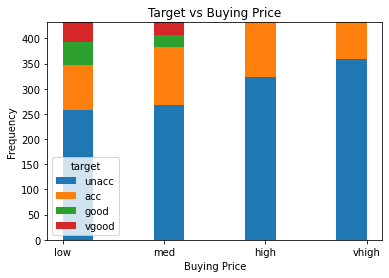

In [8]:
dat.pivot(columns='target').buying[['unacc','acc','good','vgood']].plot(kind = 'hist', stacked=True)
plt.xlabel('Buying Price')
x = list(scale_mapper1.values())
my_xticks = scale_mapper1.keys()
plt.xticks(x, my_xticks)
plt.title('Target vs Buying Price')
plt.show()

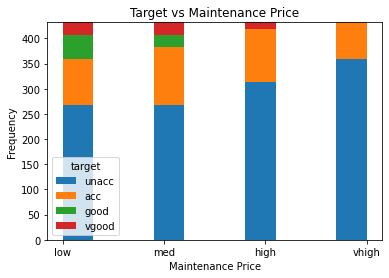

In [9]:
dat.pivot(columns='target').maint[['unacc','acc','good','vgood']].plot(kind = 'hist', stacked=True)
plt.xlabel('Maintenance Price')
x = list(scale_mapper1.values())
my_xticks = scale_mapper1.keys()
plt.xticks(x, my_xticks)
plt.title('Target vs Maintenance Price')
plt.show()

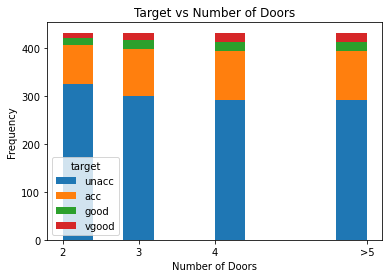

In [10]:
dat.pivot(columns='target').doors[['unacc','acc','good','vgood']].plot(kind = 'hist', stacked=True)
plt.xlabel('Number of Doors')
x = [2, 3, 4, 6]
my_xticks = ['2', '3', '4', '>5']
plt.xticks(x, my_xticks)
plt.title('Target vs Number of Doors')
plt.show()

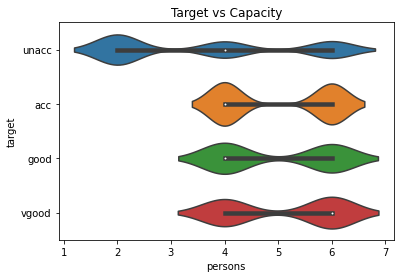

In [11]:
sns.violinplot(data = dat, x = 'persons', y = 'target',order=['unacc','acc','good','vgood'])
plt.title('Target vs Capacity')
plt.show()

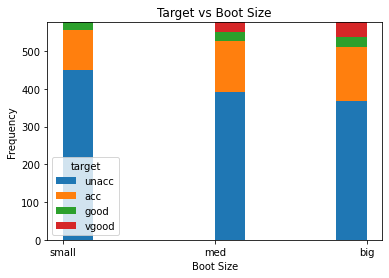

In [12]:
dat.pivot(columns='target').lug_boot[['unacc','acc','good','vgood']].plot(kind = 'hist', stacked=True)
plt.xlabel('Boot Size')
x = list(scale_mapper2.values())
my_xticks = scale_mapper2.keys()
plt.xticks(x, my_xticks)
plt.title('Target vs Boot Size')
plt.show()

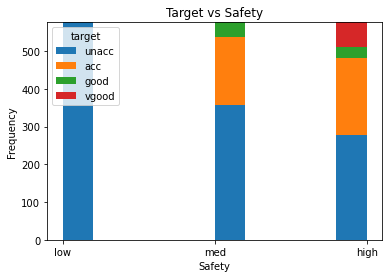

In [13]:
dat.pivot(columns='target').safety[['unacc','acc','good','vgood']].plot(kind = 'hist', stacked=True)
plt.xlabel('Safety')
x = list(scale_mapper1.values())[:-1]
my_xticks = list(scale_mapper1.keys())[:-1]
plt.xticks(x, my_xticks)
plt.title('Target vs Safety')
plt.show()

In [14]:
X = dat.drop(['target'], axis=1,inplace=False)#input variables
Y = dat[['target']]    #output vairables


#Logistic regressions
clf = DecisionTreeClassifier(criterion='gini',max_depth=12)
clf.fit(X, Y)
#getting coefficients from multivariate regressions
#coeff=regr.coef_
#print(regr.coef_)
clf.score(X,Y)

1.0

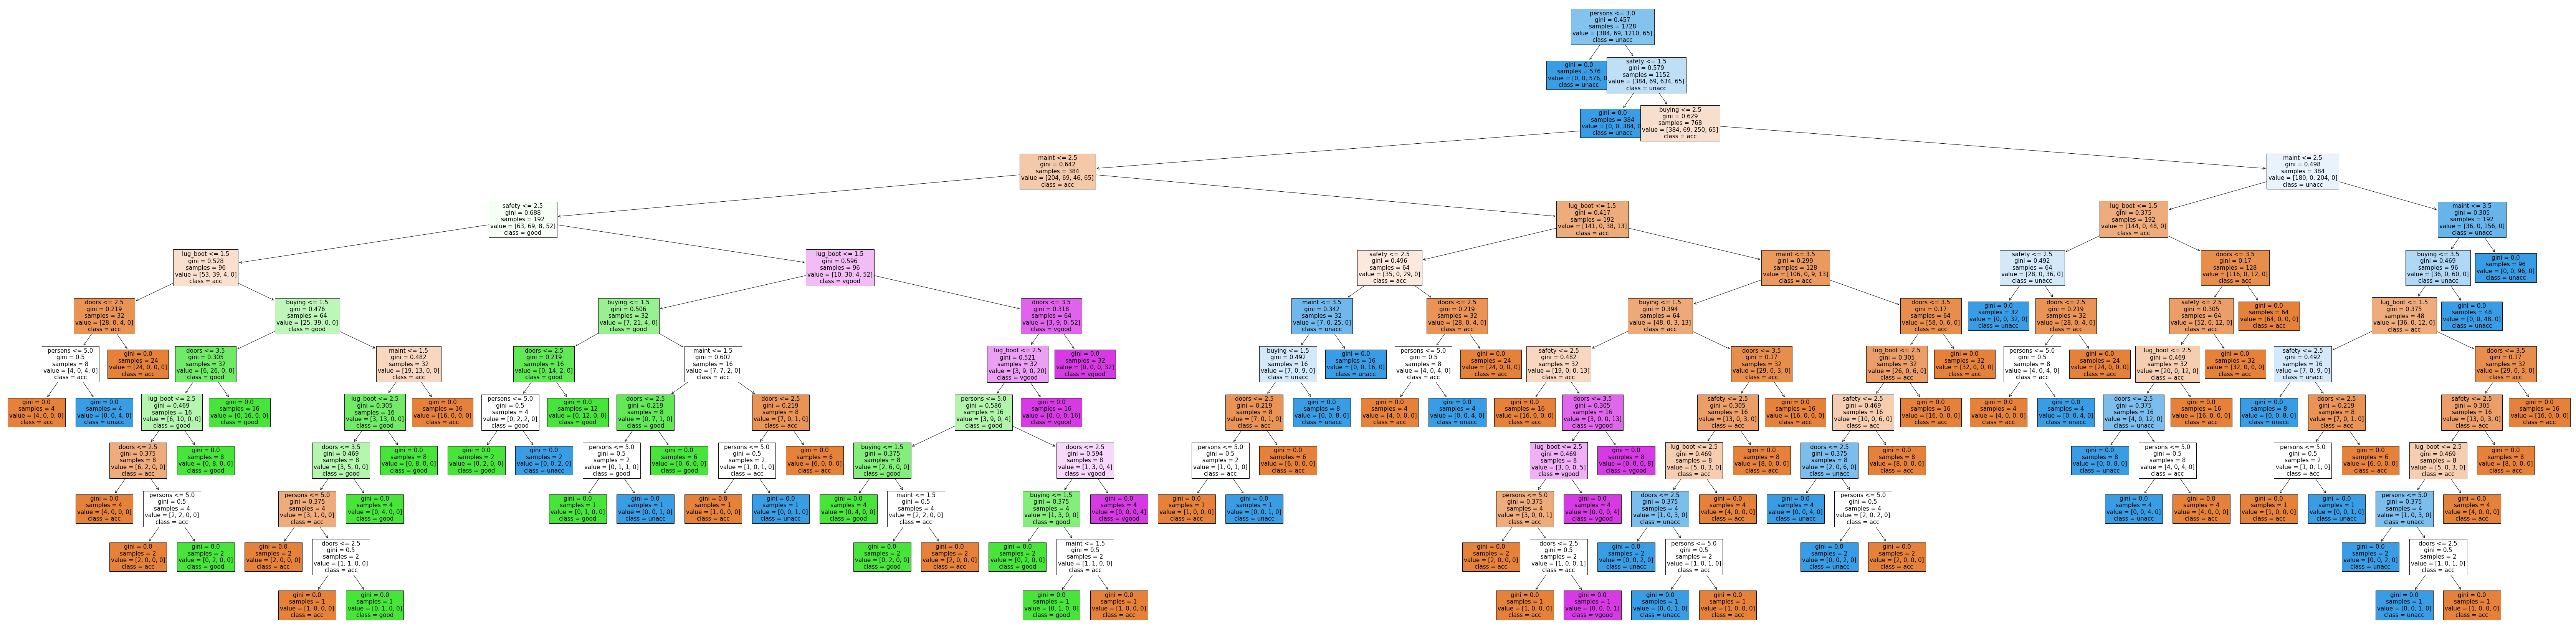

In [15]:
# plot tree
plt.figure(figsize=(120,30))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=15,filled=True,feature_names=list(X.columns), class_names=['acc','good','unacc','vgood'])
plt.show()

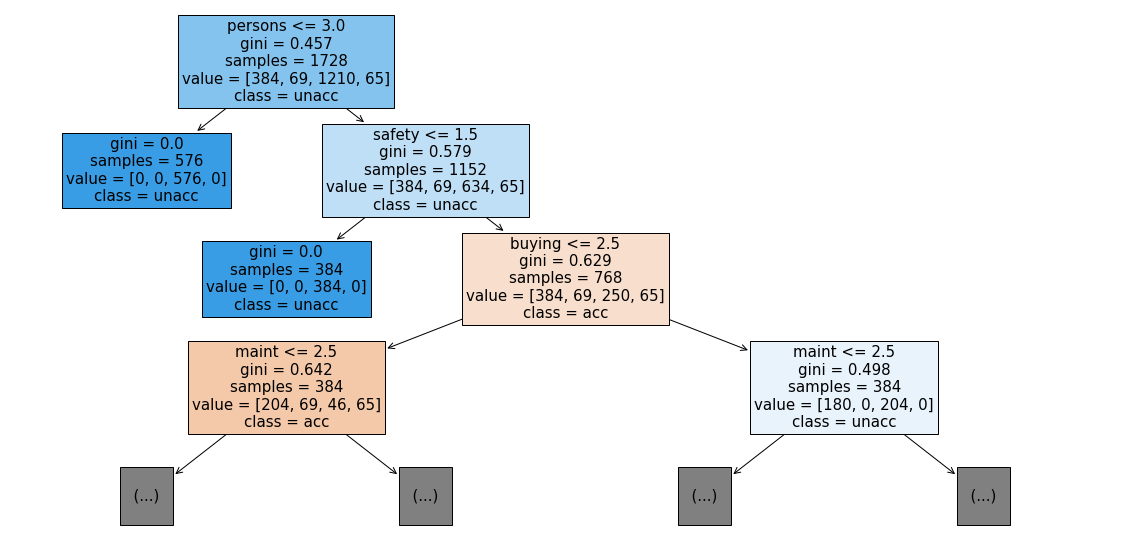

In [16]:
# plot tree
plt.figure(figsize=(20,10))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=15,filled=True,feature_names=list(X.columns), class_names=['acc','good','unacc','vgood'], max_depth=3)
plt.show()